In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./R03_25")


In [3]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [4]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-38.0,-42.0,-68.0,-76.0,-103.0,-51.0,-56.0,-124.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0,0


In [5]:
data = dataset.iloc[:, :16]
data['label'] = dataset['label']

In [6]:
data.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,Cz..,C2..,C4..,C6..,Cp5.,Cp3.,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,-29.0,-15.0,-15.0,-25.0,-10.0,-14.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,-41.0,-31.0,-34.0,-46.0,-23.0,-30.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,-53.0,-41.0,-48.0,-56.0,-50.0,-47.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,-65.0,-55.0,-58.0,-67.0,-50.0,-60.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,-73.0,-66.0,-64.0,-70.0,-48.0,-71.0,0


In [7]:
from sklearn.model_selection import train_test_split
X = data.drop(columns={"label"})
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)




In [8]:
train_accuracies = []

In [9]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, epochs=1)  
    train_accuracies.append(history.history['acc'][0])



epoch 1/100
Train on 394560 samples
394560/394560 [==============================] - 44s 113us/sample - loss: 1.0140 - acc: 0.5120
epoch 2/100
Train on 394560 samples
394560/394560 [==============================] - 43s 108us/sample - loss: 0.9498 - acc: 0.5510
epoch 3/100
Train on 394560 samples
394560/394560 [==============================] - 42s 106us/sample - loss: 0.9071 - acc: 0.5747
epoch 4/100
Train on 394560 samples
394560/394560 [==============================] - 42s 107us/sample - loss: 0.8783 - acc: 0.5890
epoch 5/100
Train on 394560 samples
394560/394560 [==============================] - 42s 107us/sample - loss: 0.8581 - acc: 0.5994
epoch 6/100
Train on 394560 samples
394560/394560 [==============================] - 42s 107us/sample - loss: 0.8428 - acc: 0.6074
epoch 7/100
Train on 394560 samples
394560/394560 [==============================] - 42s 106us/sample - loss: 0.8288 - acc: 0.6141
epoch 8/100
Train on 394560 samples
394560/394560 [==============================] 

In [12]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.8102
Test Accuracy: 0.6495


In [13]:
print(train_accuracies)

[0.5119982, 0.55101377, 0.57467556, 0.58903337, 0.59943736, 0.6073905, 0.6141119, 0.62001216, 0.62447536, 0.6276967, 0.6318912, 0.6343268, 0.63727444, 0.63969994, 0.64279956, 0.6445281, 0.6458004, 0.6479319, 0.64974403, 0.65112275, 0.65274227, 0.6545747, 0.65558344, 0.6562348, 0.6575831, 0.65803427, 0.6597628, 0.6605155, 0.6607968, 0.6619019, 0.66299677, 0.66390914, 0.6639928, 0.66546535, 0.666104, 0.6667199, 0.6670266, 0.6670519, 0.6679111, 0.6682431, 0.6697055, 0.6695509, 0.67026055, 0.6697131, 0.67073447, 0.6711451, 0.67191046, 0.6726835, 0.6723616, 0.67334247, 0.6739938, 0.6733653, 0.674341, 0.674303, 0.6744475, 0.67482764, 0.67507094, 0.67540807, 0.6755627, 0.675517, 0.67584145, 0.6766803, 0.6768958, 0.6766702, 0.67691857, 0.677831, 0.6772962, 0.67798054, 0.677831, 0.67883974, 0.6782441, 0.6787307, 0.6790653, 0.6791515, 0.6794936, 0.6798383, 0.6798839, 0.67949617, 0.67964566, 0.6800411, 0.68103456, 0.6811131, 0.6813691, 0.68077606, 0.6810726, 0.68099654, 0.6816606, 0.6831179, 0.68

In [15]:
print(sum(train_accuracies))
print(max(train_accuracies))

66.24960446357727
0.68363744


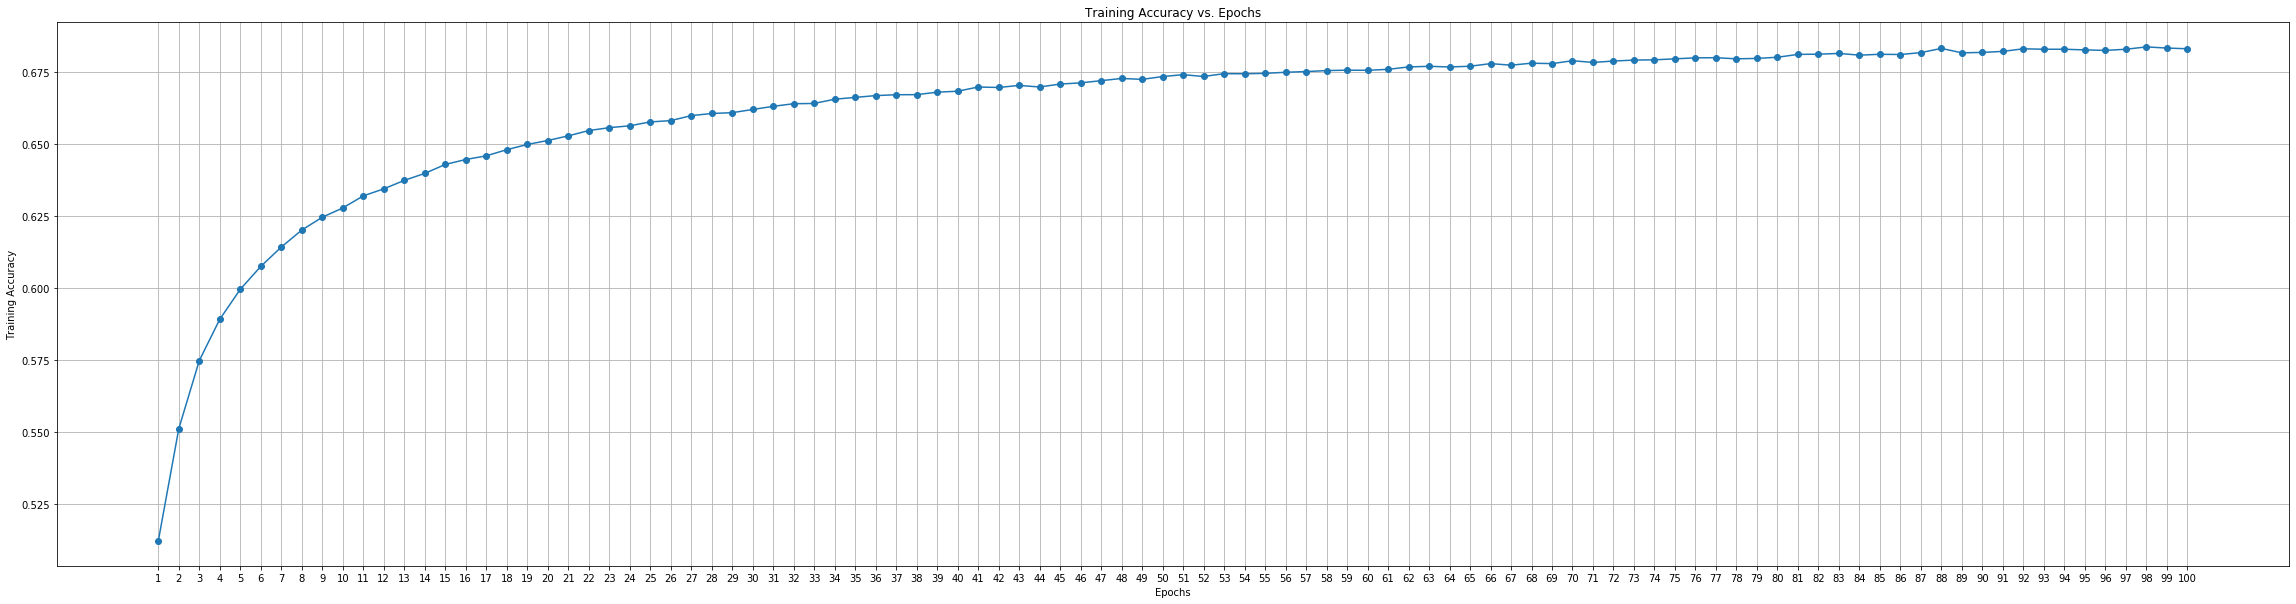

In [14]:
epochs_list = [i for i in range(1,epochs+1)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()